In [3]:
library(repr)
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [4]:
url <- "https://raw.githubusercontent.com/perdomopatrick/group7/main/forestfires.csv"

data <- read_csv(url)
data

Rows: 517 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): month, day
dbl (11): X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain, area

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0
8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0
8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0
8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0


In [5]:
data_split <- initial_split(data, prop = 0.75, strata = area)
data_training <- training(data_split)
data_testing <- testing(data_split)

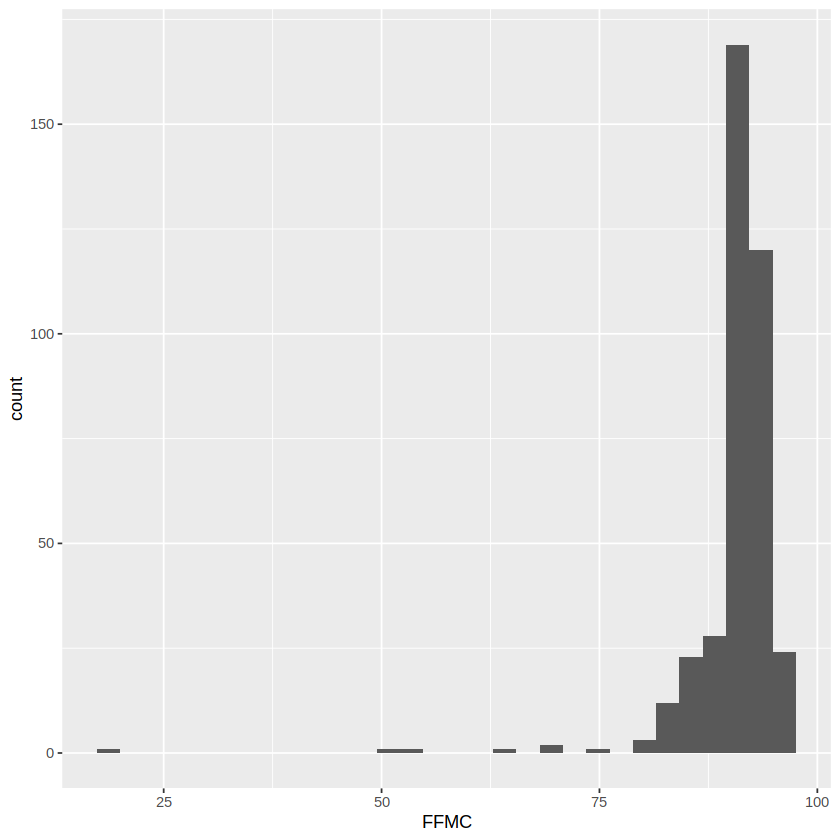

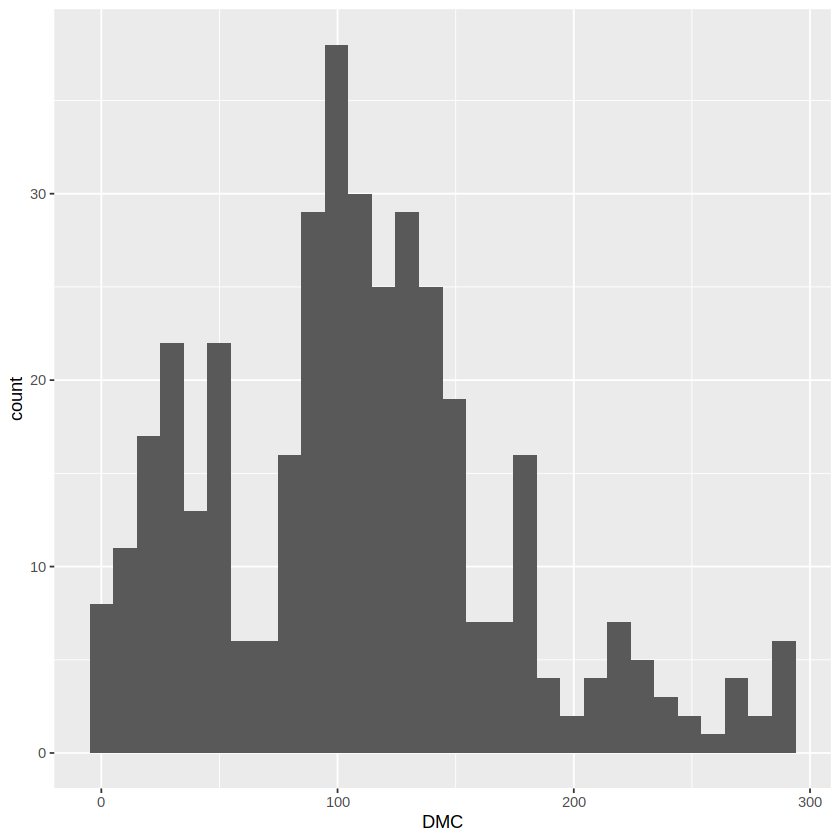

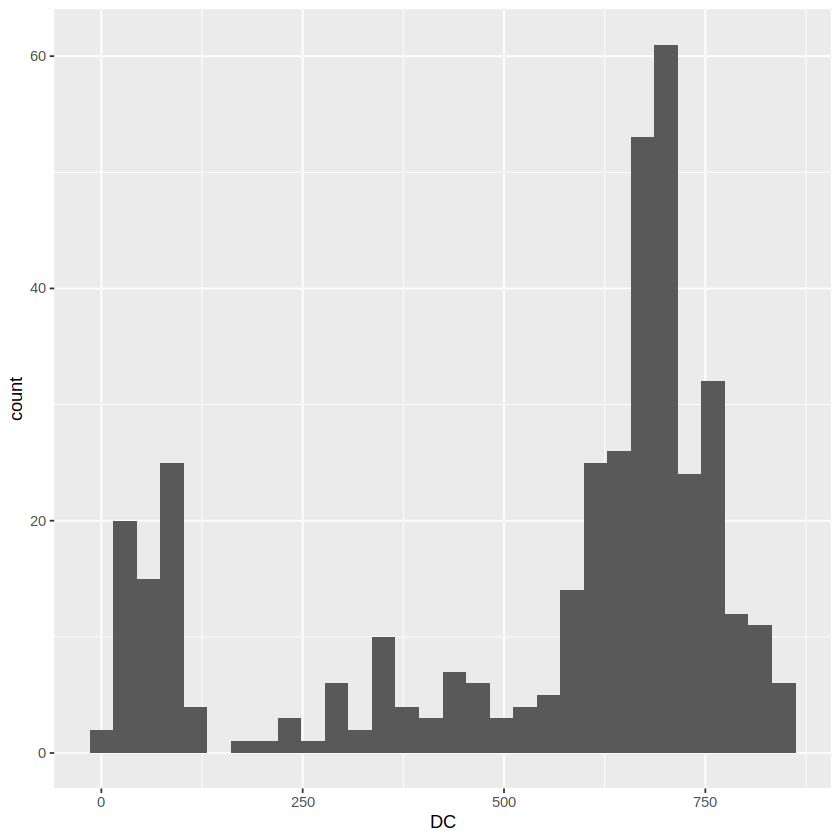

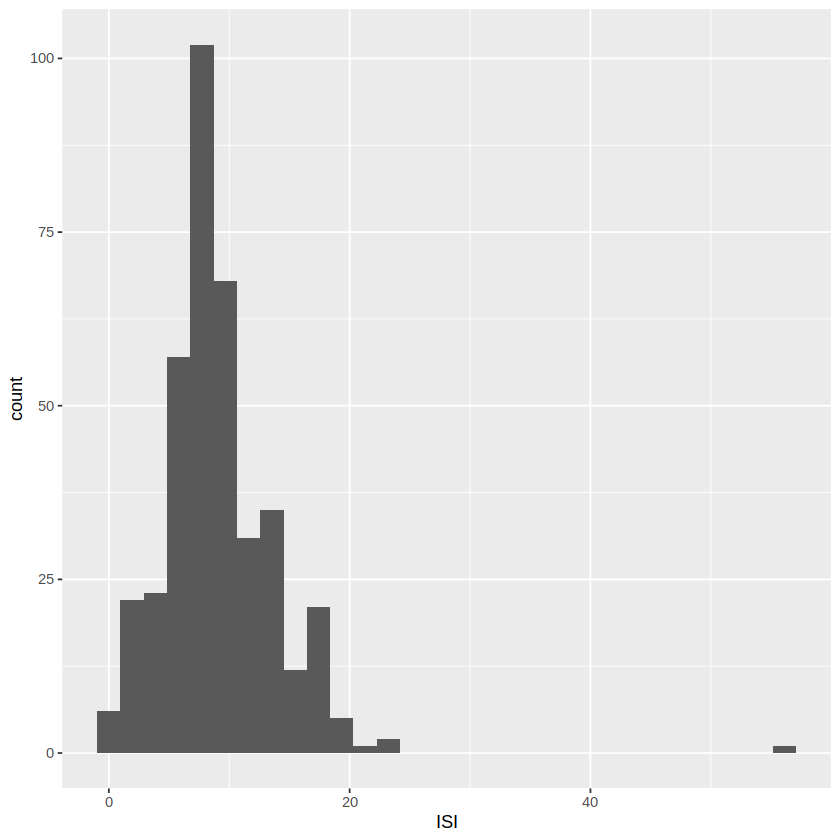

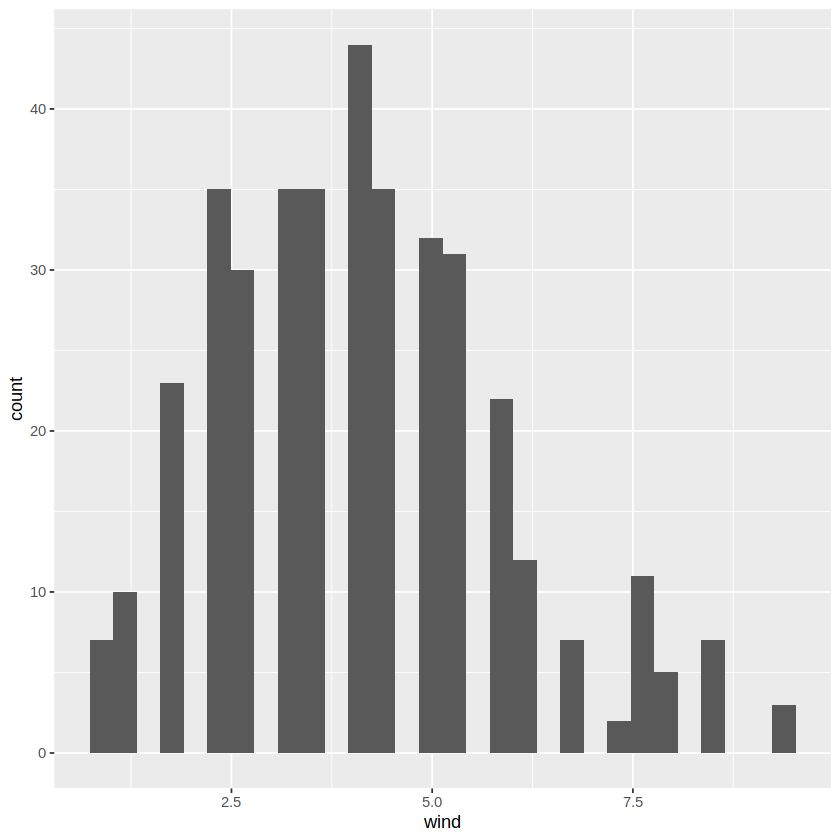

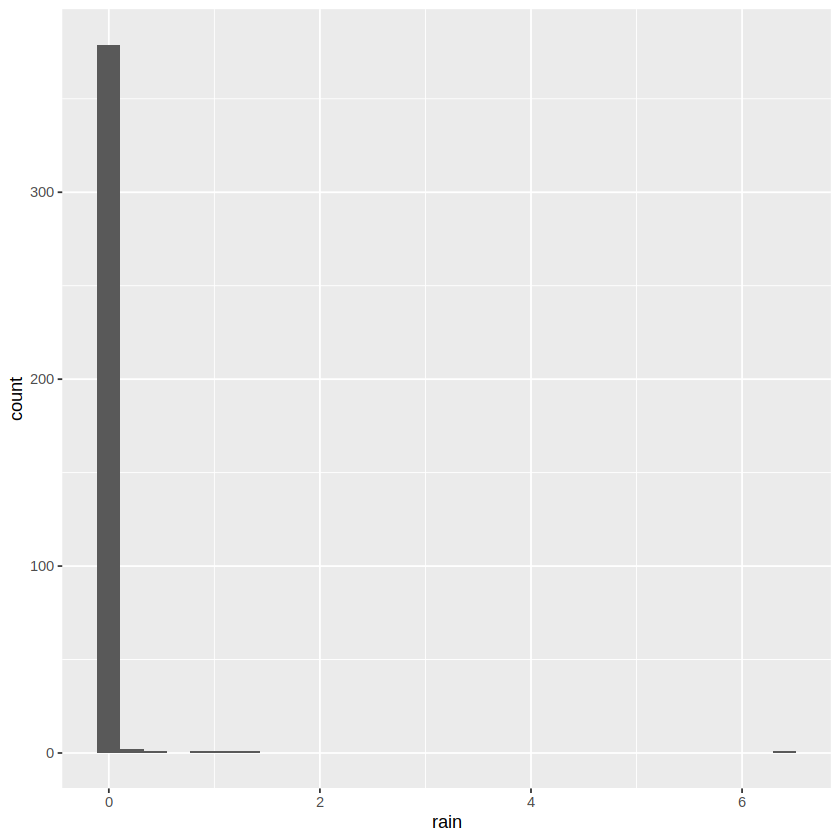

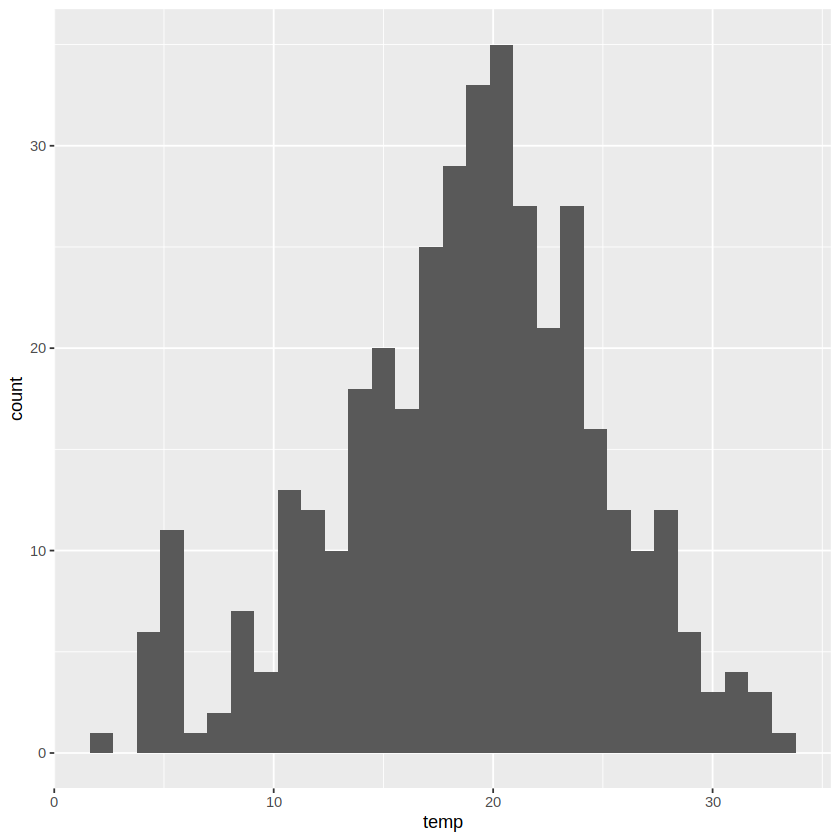

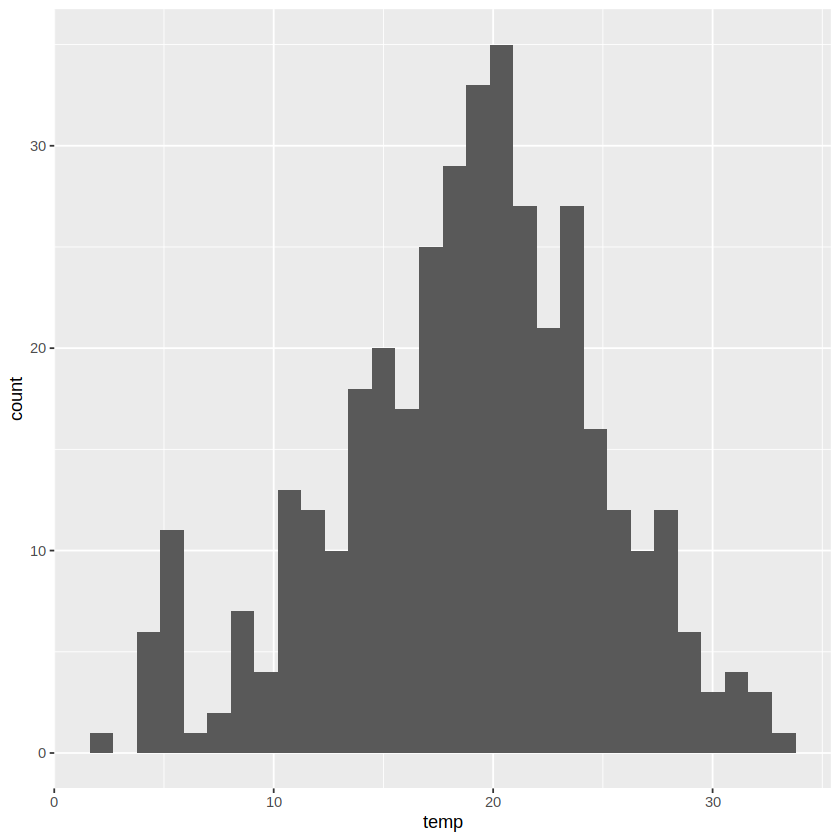

In [23]:
data_training_plot2 <- ggplot(data_training, aes(x=FFMC))+
    geom_histogram(bins = 30)
data_training_plot2
data_training_plot3 <- ggplot(data_training, aes(x=DMC))+
    geom_histogram(bins = 30)
data_training_plot3
data_training_plot8 <- ggplot(data_training, aes(x=DC))+
    geom_histogram(bins = 30)
data_training_plot8
data_training_plot4 <- ggplot(data_training, aes(x=ISI))+
    geom_histogram(bins = 30)
data_training_plot4
data_training_plot5 <- ggplot(data_training, aes(x=wind))+
    geom_histogram(bins = 30)
data_training_plot5
data_training_plot6 <- ggplot(data_training, aes(x=rain))+
    geom_histogram(bins = 30)
data_training_plot6
data_training_plot7 <- ggplot(data_training, aes(x=temp))+
    geom_histogram(bins = 30)
data_training_plot7
data_training_plot1 <- ggplot(data_training, aes(x=temp))+
    geom_histogram(bins = 30)
data_training_plot1